# Part A

## A.1
*Time Lord* (***#diffapplication***)

### Task (a)

In [11]:
def calc_coord(photo_period, photo_count):
    x_coord = []
    y_coord = []
    
    for t in range(0, photo_period*photo_count + 1, photo_period):
        x_coord.append(sin(2*pi/5 * t).n(digits=3))
        y_coord.append(cos(2*pi/5 * t).n(digits=3))
    
    sum_diff_x = 0
    sum_diff_y = 0
    for i in range(len(x_coord) - 1):
        sum_diff_x += (x_coord[i+1] - x_coord[i]) / 4
        sum_diff_y += (y_coord[i+1] - y_coord[i]) / 4
    sum_diff_x /= (len(x_coord) - 1)
    sum_diff_y /= (len(y_coord) - 1)
    
    print_coord(x_coord, y_coord, photo_period)
    print "Average rate of change on x b/w consecutive photos:", sum_diff_x.n(digits=3)
    print "Average rate of change on y b/w consecutive photos:", sum_diff_y.n(digits=3)
    
    return x_coord, y_coord

def print_coord(x_coord, y_coord, photo_period):
    print("    Time     |   " + "   x      |      y     ")
    print("-"*42)
    for idx, coords in enumerate(list(zip(x_coord, y_coord))):
        print " %6ss " % (photo_period * idx) + "    | ",
        print "  %6s " % coords[0] + "  | ",
        print("  %6s " % coords[1])
    print 

x_coord, y_coord = calc_coord(5, 4) # 5 secs every photo, 4 first photos

    Time     |      x      |      y     
------------------------------------------
      0s     |     0.000   |      1.00 
      5s     |     0.000   |      1.00 
     10s     |     0.000   |      1.00 
     15s     |     0.000   |      1.00 
     20s     |     0.000   |      1.00 

Average rate of change on x b/w consecutive photos: 0.000
Average rate of change on y b/w consecutive photos: 0.000


In this case, the average rate of change on both axes is equals to zero, meaning that if we were to see these 4 consecutive pictures, we would say that the wheel is not rotating at all.

### Task (b)

In [12]:
calc_coord(4, 4) # 4 secs every photo, 4 first photos

    Time     |      x      |      y     
------------------------------------------
      0s     |     0.000   |      1.00 
      4s     |    -0.951   |     0.309 
      8s     |    -0.588   |    -0.809 
     12s     |     0.588   |    -0.809 
     16s     |     0.951   |     0.309 

Average rate of change on x b/w consecutive photos: 0.0594
Average rate of change on y b/w consecutive photos: -0.0432


([0.000, -0.951, -0.588, 0.588, 0.951], [1.00, 0.309, -0.809, -0.809, 0.309])

In this case, it would seem like the wheel is slowly rotating backwards since the the x coordinate starts out negative and comes back to positive while y decreases (the top of the wheel spins to the opposite side of the movement).

### Task (c)

To find the instantaneous speed at $t=0$, we need to differentiate the coordinate function for x and y.<br/>

$ \dfrac{dx}{dt} = cos(\dfrac{2 \pi}{5} t) * \dfrac{2 \pi}{5}$ ⇒ $ x'(0) = cos(0) * \dfrac{2 \pi}{5} = \dfrac{2 \pi}{5} $<br/>
$ \dfrac{dy}{dt} = -sin(\dfrac{2 \pi}{5} t) * \dfrac{2 \pi}{5}$ ⇒ $ y'(0) = -sin(0) * \dfrac{2 \pi}{5} = 0 $<br/>



These calculated derivatives show the speed of change at the beginning point. If we take a look at the sine graph, we will see that at t = 0, the slope of a tangent line would have the highest value ⇒ $ \dfrac{dx}{dt} > avg\_speed_{0s \to 16s  }$ because the average also takes into account moments when the speed of change is less than maximum or negative ⇒ from pictures we would say that the wheel rotates slower.

On the other hand, for y, because it is a cosine function, then the slope at t = 0 would be equal to zero. The average rate, again, would take into account when rate of change ≠ 0.

### Task (d)

    Time     |      x      |      y     
------------------------------------------
      0s     |     0.000   |      1.00 
      4s     |    -0.951   |     0.309 
      8s     |    -0.588   |    -0.809 
     12s     |     0.588   |    -0.809 
     16s     |     0.951   |     0.309 
     20s     |     0.000   |      1.00 
     24s     |    -0.951   |     0.309 
     28s     |    -0.588   |    -0.809 
     32s     |     0.588   |    -0.809 
     36s     |     0.951   |     0.309 
     40s     |     0.000   |      1.00 
     44s     |    -0.951   |     0.309 
     48s     |    -0.588   |    -0.809 

Average rate of change on x b/w consecutive photos: -0.0122
Average rate of change on y b/w consecutive photos: -0.0377


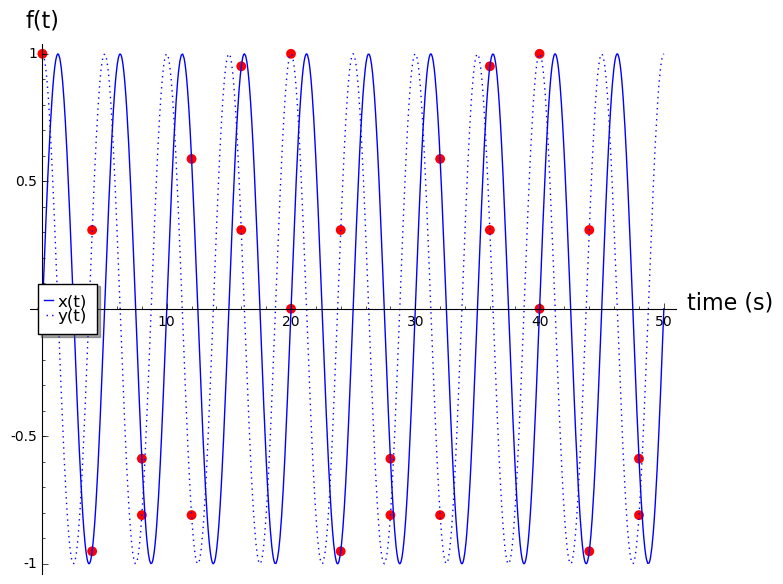

In [25]:
var('t')

x = plot(sin(2*pi/5 * t), (t, 0, 50), legend_label="x(t)")
y = plot(cos(2*pi/5 * t), (t, 0, 50), legend_label="y(t)", linestyle=":")

graph = x + y
x_coord, y_coord = calc_coord(4, 50//4)
for idx, coord in enumerate(list(zip(x_coord, y_coord))):
    graph += point((4*idx, coord[0]), color="red", pointsize=50, axes_labels=['time (s)', 'f(t)'])
    graph += point((4*idx, coord[1]), color="red", pointsize=50)

graph

***Figure 1. Coordinates of a point on the wheel from 0s to 50s. Red dots indicate moments of image capture.***

If we connect the dots on the same function, we will get a plot of how we see the values of x and y coordinates change when we look at the consecutive photos taken every 4 seconds. Example: if we look at the dots on the graph for x, we will interpret that the wheel spins backwards because the line connecting 1st and 2nd dots on x coordinate has a negative slope.

## A.2
*Chained functions* (***#difftheory***)

### Task (a)

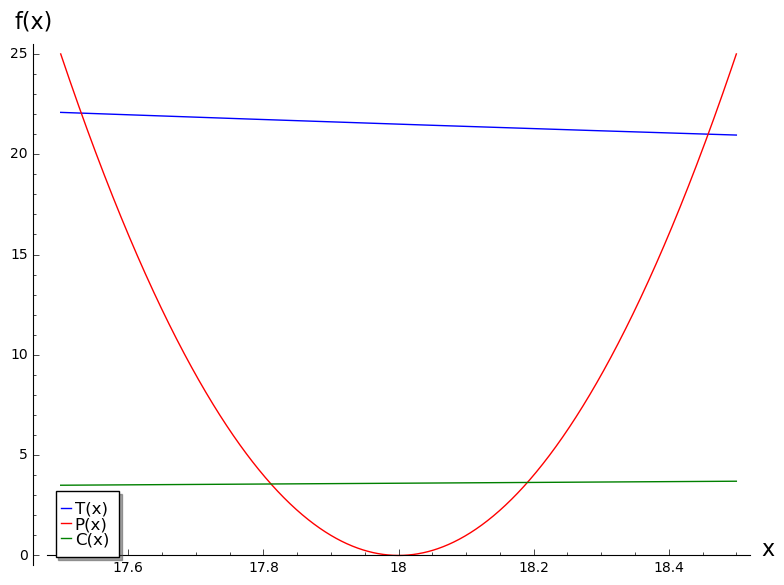

In [194]:
t = var('t')

T = plot(24 + 5*sin(pi/12 * (t-4)), (t, 17.5, 18.5), legend_label="T(x)")
P = plot(100 * (t - 18)^2, (t, 17.5, 18.5), color="red", legend_label="P(x)")
C = plot(0.2 * t, (t, 17.5, 18.5), axes_labels=['x', 'f(x)'], color="green", legend_label="C(x)")

T + P + C

***Figure 2. Graphs of room temperature, air conditioner power, and cost for air conditioning.***

### Task (b)

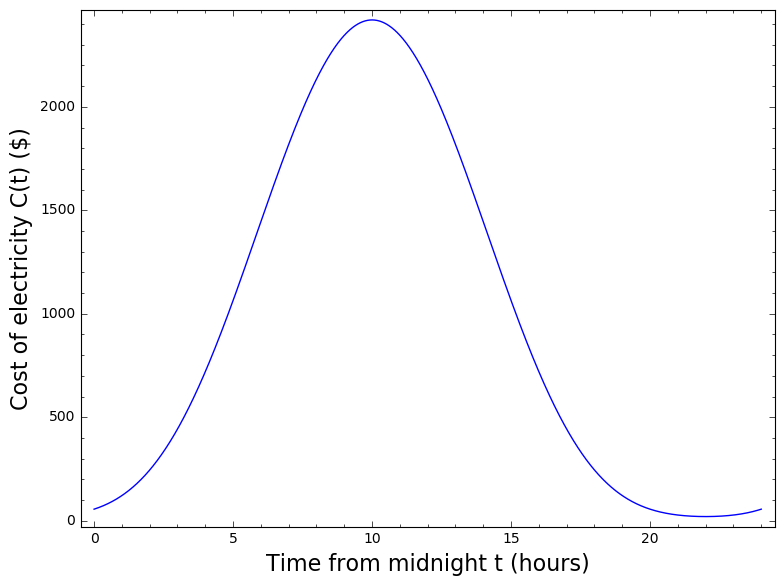

In [198]:
var('t')

T(t) = 24 + 5*sin(pi/12 * (t-4))
P(t) = 100 * (T(t) - 18)^2
C(t) = 0.2 * P(t)

plot(C, (t, 0, 24), axes_labels=['Time from midnight t (hours)','Cost of electricity C(t) ($)'], axes=False, frame=True)

***Figure 3. Graph of added cost to electricity bill depending on time. Peak is at 10 AM.***

In this composite function we can see that cost depends on power consumption that depends on temperature at the time. From the graph we can see that at 10 AM (10 hours from midnight), function T(t) reaches its maximum at $ sin \dfrac{\pi}{2} $. Therefore, P(T) is maximized because $T(t) \geq 19$, and under square we have T - 18. C(P) then reaches its maximum because it is linearly dependent on P(T).

In [216]:
from __future__ import print_function # so that we can use print syntax from Python 3
print("Cost added at noon: $", C(12).n(digits=6), sep="") # 12 hours past midnight

Cost added at noon: $2134.23


### Task (c)

$ \dfrac{dC}{dt} = \dfrac{dC}{dP} * \dfrac{dP}{dT} * \dfrac{dT}{dt} = 0.2 * 200*(24 + 5sin(\dfrac{\pi t}{12} - \dfrac{\pi}{3}) - 18) * \dfrac{5 \pi}{12} cos(\dfrac{\pi t}{12} - \dfrac{\pi}{3}) = \dfrac{50\pi}{3} * (5sin(\dfrac{\pi t}{12} - \dfrac{\pi}{3}) + 6) * cos(\dfrac{\pi t}{12} - \dfrac{\pi}{3}) $<br/>

Let's now put $t=12$ to see how the function behaves at that point. $ \dfrac{50\pi}{3} * (5sin(\dfrac{12 * \pi }{12} - \dfrac{\pi}{3}) + 6) * cos(\dfrac{12 * \pi}{12} - \dfrac{\pi}{3}) = \dfrac{50\pi}{3} * (5sin(\dfrac{2\pi}{3}) + 6) * cos(\dfrac{2\pi}{3}) = \dfrac{50\pi}{3} * (\dfrac{5 \sqrt{3}}{2} + 6) * (-\dfrac{1}{2}) = -\dfrac{25\pi}{3} * (\dfrac{5 \sqrt{3}}{2} + 6) $<br/>

We can see that at $t=12$ the derivative (or the slope of the tangent) is negative, meaning that the cost is **decreasing** at that moment.

In [230]:
# checking
C_der(t) = derivative(C(t))
C_der(12)

-4.16666666666667*pi*(5*sqrt(3) + 12)

### Task (d)

1) $ \dfrac{dC}{dP} = 0.2 $<br/>
2) $ \dfrac{dP}{dT} = 100 * 2(T-18) = 200(T-18) $<br/>
3) $ \dfrac{dT}{dt} = 5cos(\dfrac{\pi}{12}(t-4)) * \dfrac{\pi}{12} = \dfrac{5 \pi}{12} cos(\dfrac{\pi t}{12} - \dfrac{\pi}{3}) $<br/>

These three rates are directly related to $ \dfrac{dC}{dt} $ because it is a differential of a composition of functions, namely $ C(P(T(t))) $, therefore, the derivative of $C$ w.r.t to $t$ would be the product $ \dfrac{dC}{dt} = \dfrac{dC}{dP} \dfrac{dP}{dT} \dfrac{dT}{dt} $ (applying the chain rule).

# Part B

## B.1
*Need for speed* (***#diffapplication***)

### Task (a)

$ avg\_speed_{10mi \to 20mi} = \dfrac{\Delta_{distance}}{\Delta_{time}} = \dfrac{20 - 10}{12} = \dfrac{5}{6} \space (\dfrac{mi}{min}) $

### Task (b)

$ avg\_speed_{20mi \to 21mi} = \dfrac{\Delta_{distance}}{\Delta_{time}} = \dfrac{21 - 20}{1} = 1 \space (\dfrac{mi}{min}) $<br/>

It depends on what we want. If we need the average speed during this last mile then it is a great estimate, but if we need the immediate speed at mark 20 or 21 mi then we could do better by shortening the deltas above. Vice versa, if we need the average speed for the whole trip then the calculation in (a) makes more sense.

### Task (c)

If we measure in a time frame of 0.3 sec, we can count it as instantaneous in real life because the time interval is relatively tiny, but speaking of Mathematics, instantaneous speed would be when we do $ lim_{\Delta time \to 0} \dfrac{\Delta distance}{\Delta time} $.

### Task (d)

It would measure the instantaneous speed because the time it needs to measure speed is very small, considering that it turns based on the strength of the electromagnetic field generated by the rotor's spinning speed. 

### Task (e)

If x(t) is the function that describes the position of the car at time t, then the instant speed of the car would be $ lim_{\Delta t \to 0} \dfrac{x(t + \Delta t) - x(t)}{\Delta t} $. It is very similar to what we did in (a)-(c) but to make sure that we're measuring speed at an exact moment, we make the time interval tend to zero.

## B.2

The root of all problems (***#difftheory***)

### Task (a)

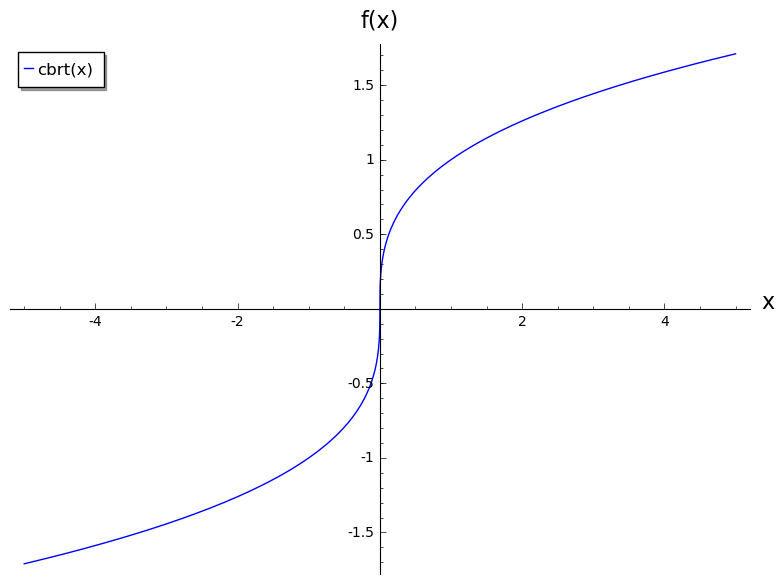

In [30]:
f(x) = sign(x)*abs(x)**(1/3)
plot(f, (x, -5, 5), axes_labels=['x', 'f(x)'], legend_label="cbrt(x)")

### Task (b)

To find the slope of the tangent line, we would want to calculate the derivative at the point of tangency:<br/>

$$ f'(x_0) = \dfrac{1}{3 \sqrt[3]{x_0^2}} $$

Then, we will write down the equation for the line that passes through $(x_0, f(x_0))$

$$ y_{tan}(x) - f(x_0) = f'(x_0)(x - x_0) $$

$$ y_{tan}(x) = f'(x_0)(x - x_0) + f(x_0) $$

### Task (c)

To calculate $ \sqrt[3]{10} $, we need to find $x_0$ "close enough" to 10, for which we know the exact answer, draw a tangent line that passes through $ (x_0, f(x_0)) $. Since $x_0$ is close enough, the linear approximation line (tangent) can estimate the real value on a small boundary around $x_0$. This point would be 8, since $ \sqrt[3]{8} = 2 $.

$$ f(8) = 2 $$
$$ f'(8) = \dfrac{1}{3 \sqrt[3]{8^2}} = \dfrac{1}{3 * 4} = \dfrac{1}{12}$$
$$ y_{tan}(x) = f'(8)(x - 8) + f(8) = \dfrac{1}{12}(x - 8) + 2 = \dfrac{x}{12} + \dfrac{4}{3} $$

Linear estimation at x = 10:

$$ y_{tan}(10) = \dfrac{10}{12} + \dfrac{4}{3} = \dfrac{13}{6} ⇒ \sqrt[3]{10} ≈ 2.166$$ 

The actual value for $ \sqrt[3]{10} = 2.15443469003 $. Therefore, the relative error would be $ \dfrac{|2.166 - 2.154|}{2.154} * 100\% = 0.56\%. $

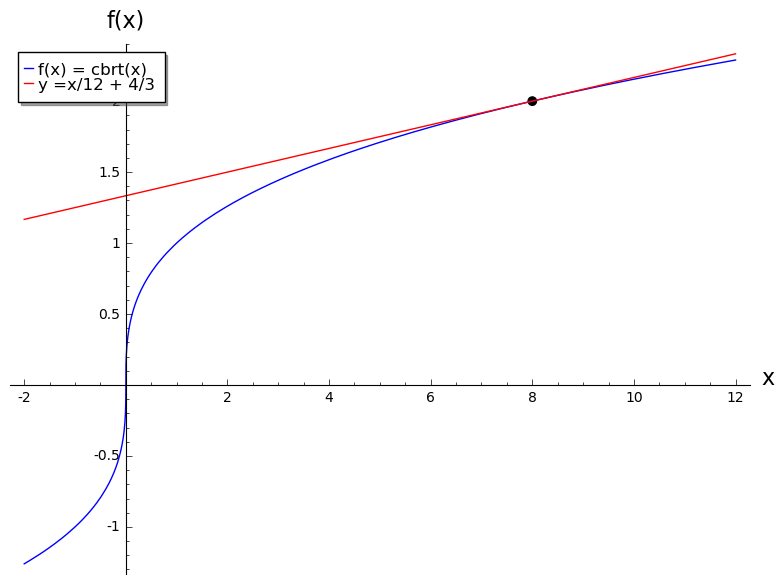

In [31]:
f = plot(sign(x)*abs(x)**(1/3), (x, -2, 12), legend_label="f(x) = cbrt(x)", axes_labels=['x', 'f(x)'])
g = plot(x/12 + 4/3, (x, -2, 12), color="red", legend_label="y =x/12 + 4/3")
intersection = point((8, 2), color="black", pointsize=50)
f + g + intersection

***Figure 4. Graph of cube root function and a linear approximation, tangent to the function at x = 8.***

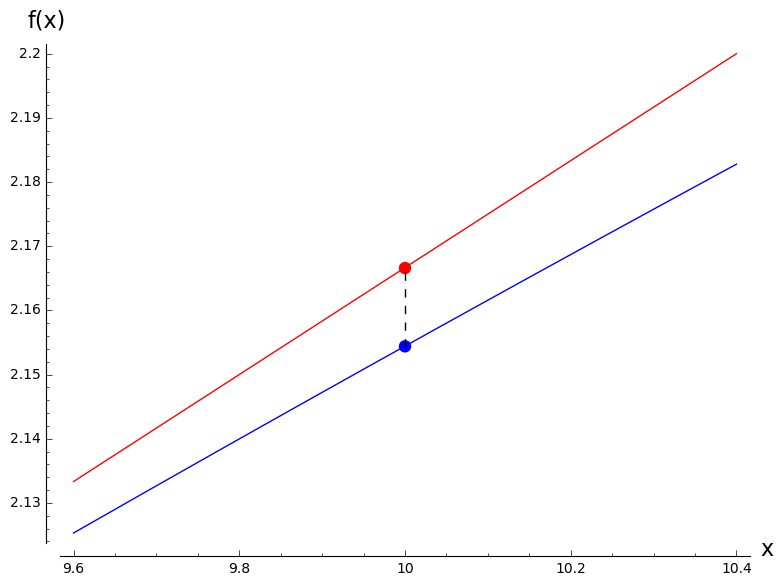

In [299]:
f = plot(sign(x)*abs(x)**(1/3), (x, 9.6, 10.4), axes_labels=['x', 'f(x)'])
g = plot(x/12 + 4/3, (x, 9.6, 10.4), color="red")
lin_est_pt = point((10, 2.1666), color="red", pointsize=80)
real_pt = point((10, 2.1544), color="blue", pointsize=80)
lin_est = line([(10, 2.166), (10, 2.154)], color="black", linestyle='--')
f + g + lin_est + lin_est_pt + real_pt

***Figure 5. Relative error of the linear approximation, tangent at x = 8 for the cube root function value at x = 10.***

### Task (d)

If we would like to estimate the cube root of 515, we would not want to use the same linear approximation from point (8, 2) because the cubic root function is not linear, and the further away we get from that point of tangency, the worse results we will get. Instead, we would want to pick another point of tangency near 515, for example, 512 whose cube root is 8.

### Task (e)

$$ y_{tan}(x) = f'(512)(x - 512) + f(512) = \dfrac{1}{192}(x - 512) + 8 = \dfrac{x}{192} + \dfrac{16}{3} $$
$$ y_{tan}(515) = \dfrac{515}{192} + \dfrac{16}{3} = 8.015625 $$. $$ \sqrt[3]{515} ≈ 8.01559458137656 $$

Relative error:
$$ \dfrac{|8.015625 - 8.01559458137656|}{8.01559458137656} * 100\% = 3.79493... × 10^{-4}\% < 0.0004 \% $$

We can observe that this relative error is much smaller than the one for approximated $ \sqrt[3]{10} $. This is because the cube root function's speed of growth decreases as argument grows. Therefore, a linear approximator's slope would be able to represent a wider range for bigger (by abs. value) x.